In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import healpy as hp
import pysm3

from fgbuster import (CMB, Dust, Synchrotron,
                      basic_comp_sep,
                      get_observation, get_instrument)
from fgbuster.visualization import corner_norm

In [2]:
nside = 16
instrument = get_instrument('LiteBIRD')
freq_maps = get_observation(instrument, 'c1d1s1', nside=nside)
freq_maps_0 = get_observation(instrument, 'c1d0s0', nside=nside)
#print(help(get_observation))
#c1s0s0 is the kind of sky observed. It is a string that correspond to an object of pysm3.sky

/home/amorelli/fgbuster/fgbuster/observation_helpers.py:97: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  return df.dropna(1, 'all')


In [3]:
print(freq_maps)

[[[ 4.99404973e+01  2.41721582e+01 -2.82415439e+01 ...  5.41158105e+00
    3.82566767e+01  9.00335599e+01]
  [-1.24816297e+00  2.06428584e-01 -7.93813144e-01 ...  8.67231890e-01
   -1.35328005e+00  8.63078622e-01]
  [-7.77792202e-01  1.01201543e+00 -3.50791721e-01 ...  1.32208335e-01
    2.79647574e-01 -9.31147416e-01]]

 [[ 4.50553489e+01  1.99919250e+01 -3.30307842e+01 ... -2.90214395e-02
    3.24135836e+01  8.47718493e+01]
  [-6.96239755e-01  1.93073469e-01 -5.44628538e-01 ...  4.21318448e-01
   -8.38215172e-01  5.04727673e-01]
  [-4.29824790e-01  4.70654780e-01 -5.06691363e-02 ... -1.59499355e-03
    1.54392887e-01 -5.36178415e-01]]

 [[ 4.29924930e+01  1.82676397e+01 -3.50192737e+01 ... -2.25861362e+00
    3.00082367e+01  8.25998974e+01]
  [-4.44413343e-01  1.87533674e-01 -4.30408893e-01 ...  2.36131216e-01
   -6.12401330e-01  3.58851431e-01]
  [-2.79268187e-01  2.30214398e-01  8.39520298e-02 ... -7.86557533e-02
    1.14870448e-01 -3.69675549e-01]]

 ...

 [[ 6.90556628e+01  5.163

In [4]:
#print(instrument)

In [5]:
print(freq_maps.shape)
print(16*12*16**2*2*8.0)

(15, 3, 3072)
786432.0


In [6]:
components = [CMB(), Dust(150.), Synchrotron(20.)]
result = basic_comp_sep(components, instrument, freq_maps)
result_0 = basic_comp_sep(components, instrument, freq_maps_0)
print(help(basic_comp_sep))
#print(help(Dust))
#print(help(Synchrotron))

Help on function basic_comp_sep in module fgbuster.separation_recipes:

basic_comp_sep(components, instrument, data, nside=0, **minimize_kwargs)
    Basic component separation
    
    Parameters
    ----------
    components: list
        List storing the :class:`Component` s of the mixing matrix
    instrument:
        Object that provides the following as a key or an attribute.
    
        - **frequency**
        - **depth_i** or **depth_p** (optional, frequencies are inverse-noise
          weighted according to these noise levels)
    
        They can be anything that is convertible to a float numpy array.
    data: ndarray or MaskedArray
        Data vector to be separated. Shape *(n_freq, ..., n_pix).*
        *...* can be
    
        - absent or 1: temperature maps
        - 2: polarization maps
        - 3: temperature and polarization maps (see note)
    
        Values equal to `hp.UNSEEN` or, if `MaskedArray`, masked values are
        neglected during the component sepa

In [7]:
print(result.params)
print(result.x)

['Dust.beta_d', 'Dust.temp', 'Synchrotron.beta_pl']
[ 1.79224243 21.0495109  -0.0536808 ]


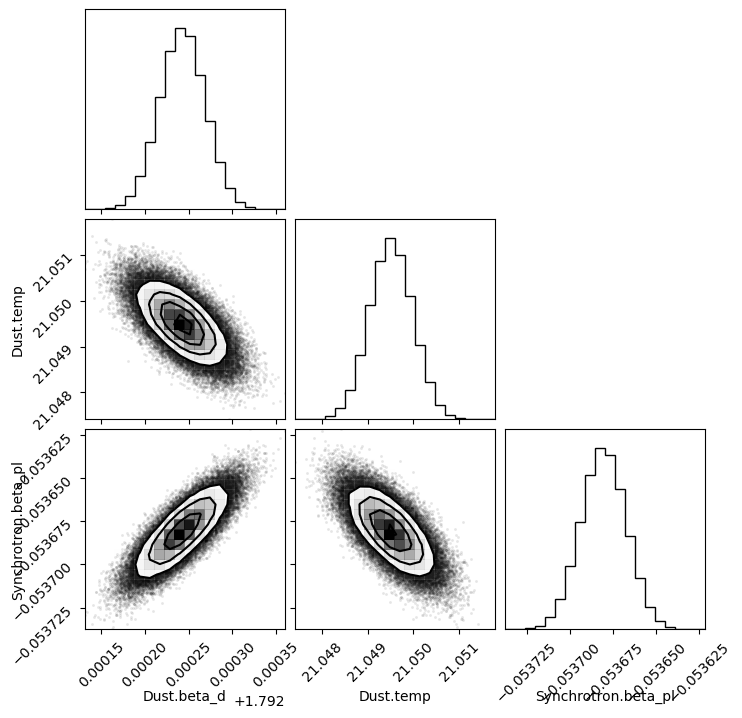

In [8]:
corner_norm(result.x, result.Sigma, labels=result.params)

In [9]:
print(result.s.shape)
# i think first index tell the component -> 0=cmb 1=dust ..
# the second index give the map: 0=T, 1=Q 2=U

(3, 3, 3072)


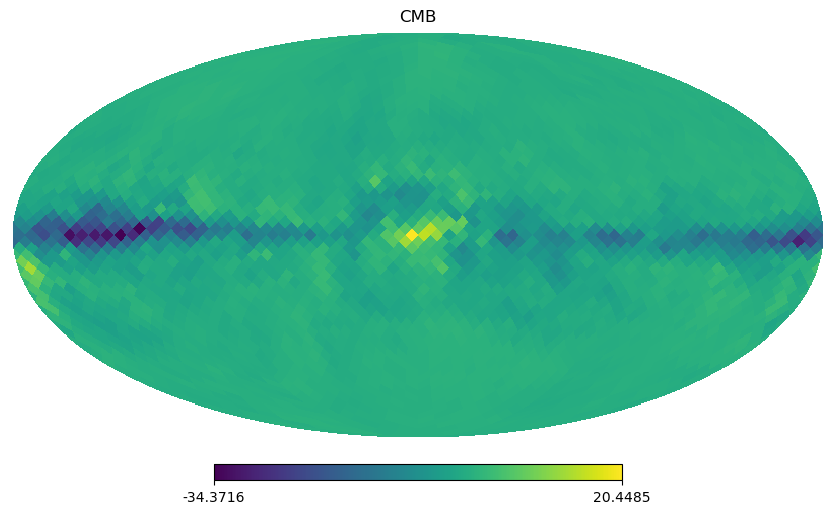

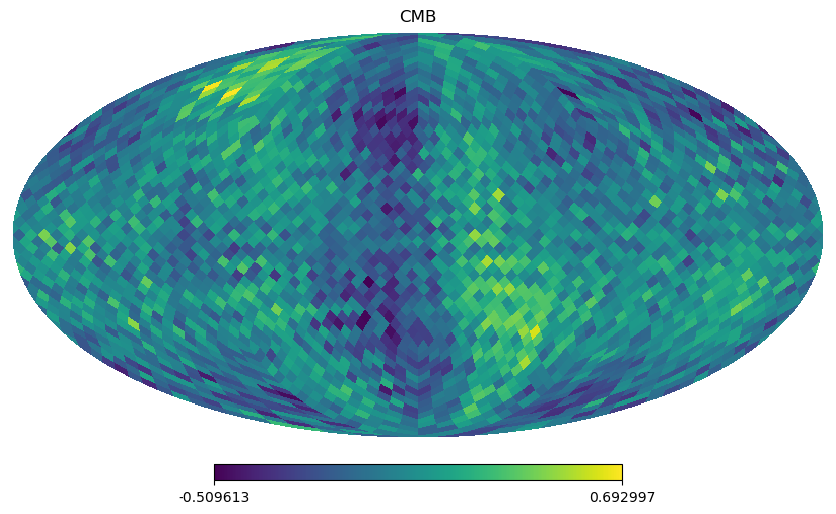

In [10]:
hp.mollview(result.s[0,1], title='CMB')#, norm='hist') # it is in uK (in uk the range shoud be -300 +300 uK)
hp.mollview(result_0.s[0,1], title='CMB')#, norm='hist') # it is in uK (in uk the range shoud be -300 +300 uK)

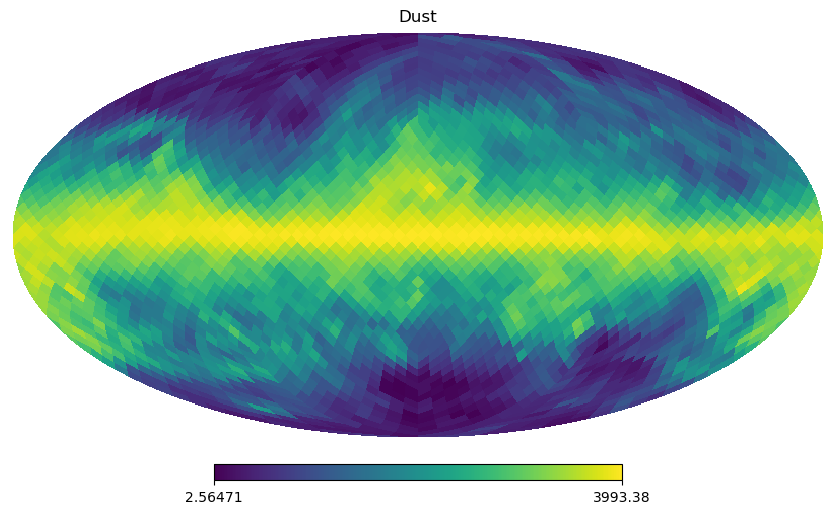

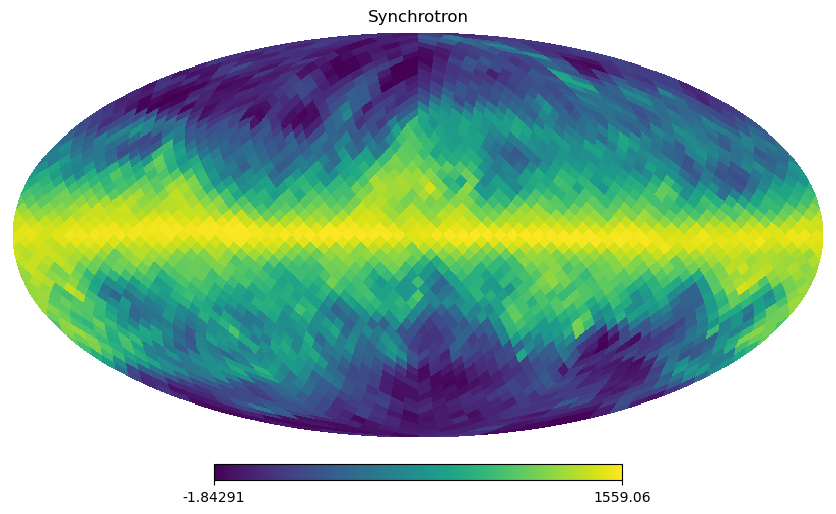

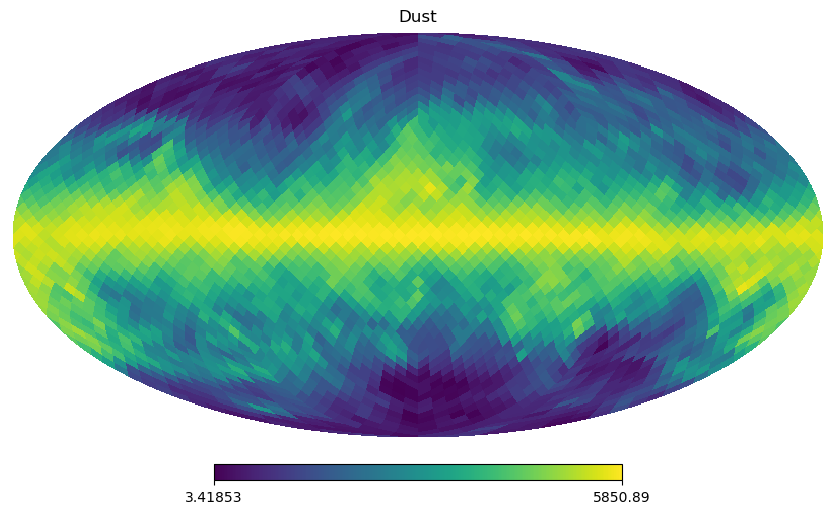

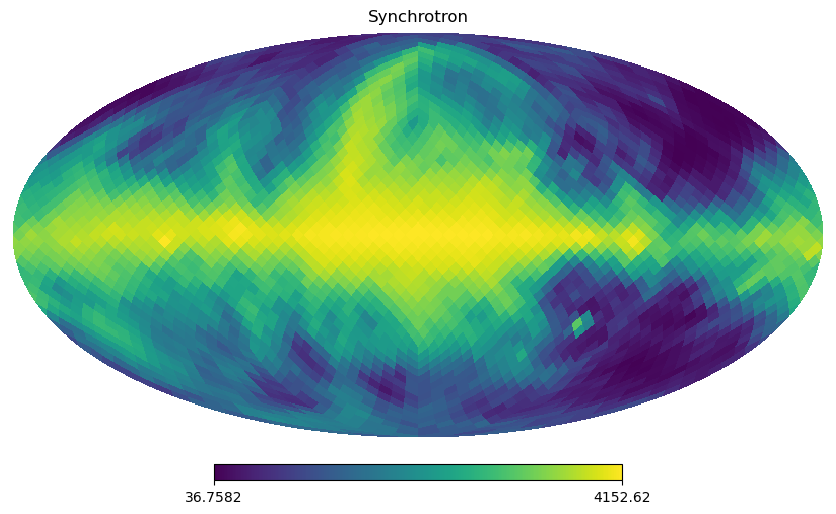

In [11]:
hp.mollview(result.s[1,0], title='Dust', norm='hist')
hp.mollview(result.s[2,0], title='Synchrotron', norm='hist')
hp.mollview(result_0.s[1,0], title='Dust', norm='hist')
hp.mollview(result_0.s[2,0], title='Synchrotron', norm='hist')

In [12]:
#compare with map 